About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [2]:
df = pd.read_csv('Pokemon.csv')
df.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
453,408,Cranidos,Rock,NaN,350,67,125,40,30,30,58,4,False
272,252,Treecko,Grass,NaN,310,40,45,35,65,55,70,3,False
68,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

In [5]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**Answer** \#YOUR ANSWER

**Numerical features**: Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

**Categorical (Nominal) features**: Name, Type 1, Type 2, Legendary

**Categorical (Ordinal) feature**: Generation

**Ordinal (ID)**: The # column is technically an identifier, which can be treated as ordinal

# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [9]:
#YOUR CODE
# Create the 'New Total' column by summing
df['New Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# Display result
print(df[['Name', 'Total', 'New Total']].head())

                    Name  Total  New Total
0              Bulbasaur    318        318
1                Ivysaur    405        405
2               Venusaur    525        525
3  VenusaurMega Venusaur    625        625
4             Charmander    309        309


Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [13]:
#YOUR CODE


# Filter rows where 'Total' and 'New Total' have different values
mismatched_rows = df[df['Total'] != df['New Total']]

# Get the number of mismatched rows
mismatched_rows


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Total


#There is no row with New-Total different from the Total

# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [14]:
#YOUR CODE
# Create a frequency table for the 'Type 1' feature
type_1_frequency = df['Type 1'].value_counts()

# Display the frequency table
print(type_1_frequency)


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [15]:
#YOUR CODE

# Create a frequency table for the 'Type 1' feature and convert to DataFrame
type_1_frequency_df = df['Type 1'].value_counts().to_frame(name='Frequency')

# Add proportions column
type_1_frequency_df['Proportion'] = type_1_frequency_df['Frequency'] / type_1_frequency_df['Frequency'].sum()

# Add percentage column
type_1_frequency_df['Percentage'] = type_1_frequency_df['Proportion'] * 100

# Display the table with Frequency, Proportion, and Percentage
print(type_1_frequency_df)


          Frequency  Proportion  Percentage
Water           112     0.14000      14.000
Normal           98     0.12250      12.250
Grass            70     0.08750       8.750
Bug              69     0.08625       8.625
Psychic          57     0.07125       7.125
Fire             52     0.06500       6.500
Electric         44     0.05500       5.500
Rock             44     0.05500       5.500
Dragon           32     0.04000       4.000
Ground           32     0.04000       4.000
Ghost            32     0.04000       4.000
Dark             31     0.03875       3.875
Poison           28     0.03500       3.500
Steel            27     0.03375       3.375
Fighting         27     0.03375       3.375
Ice              24     0.03000       3.000
Fairy            17     0.02125       2.125
Flying            4     0.00500       0.500


Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

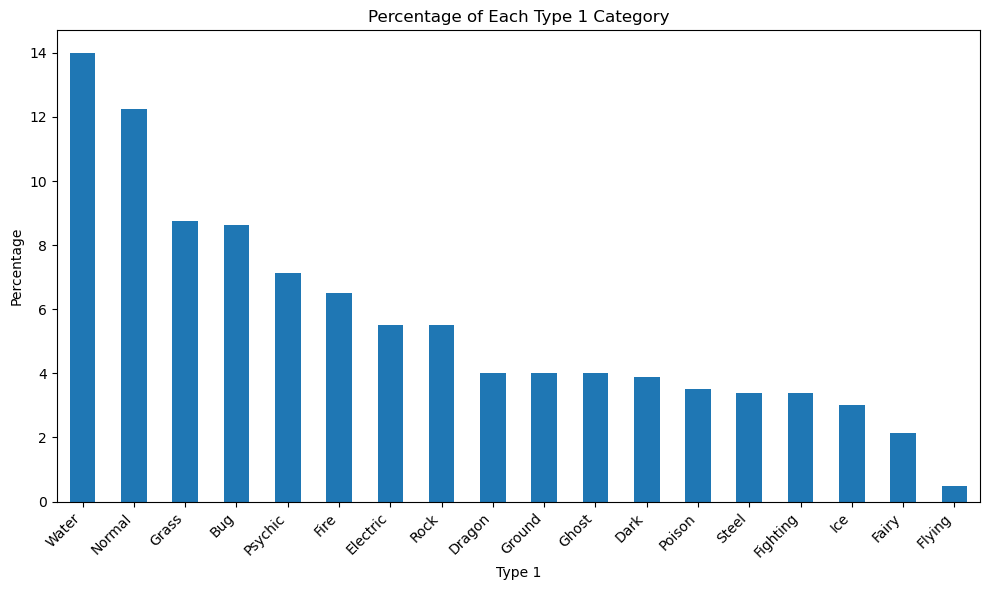

In [16]:
#YOUR CODE
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot the percentages for each "Type 1" category
type_1_frequency_df['Percentage'].plot(kind='bar')

# Set labels and title
plt.title('Percentage of Each Type 1 Category')
plt.xlabel('Type 1')
plt.ylabel('Percentage')

# Make x-axis labels readable by rotating them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)

**Answer** \#YOUR ANSWER



The plot shows that there are 18 different "Type 1" categories. This suggests a rich variety of Pokémon types in the dataset, allowing for diverse strengths, weaknesses, and gameplay strategies.

Water is the most frequent type, accounting for about 14% of all Pokémon in the dataset. This makes it the most common primary type, indicating that water-type Pokémon are heavily represented.

Following Water, Normal is the second most common type at 12.25%. Grass, Bug, and Psychic types also appear frequently, each accounting for roughly 7-9% of the Pokémon

Flying is the least common type, making up only about 4 Pokémon (less than 1%) in the dataset. This makes it the rarest primary type.
Fairy is another relatively rare type, comprising 17 Pokémon, which is only about 1.7% of the dataset.

There is a noticeable imbalance in the distribution of Pokémon types. A few types like Water and Normal dominate the dataset, while others like Flying and Fairy are much less common

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [22]:
col = 'Sp. Atk'
#YOUR CODE

mean_value = df[col].mean()
median_value = df[col].median()
mode_value = df[col].mode() [0]

# Print the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")


Mean: 72.82
Median: 65.0
Mode: 60


Draw a histogram for the feature and depict the measures on it

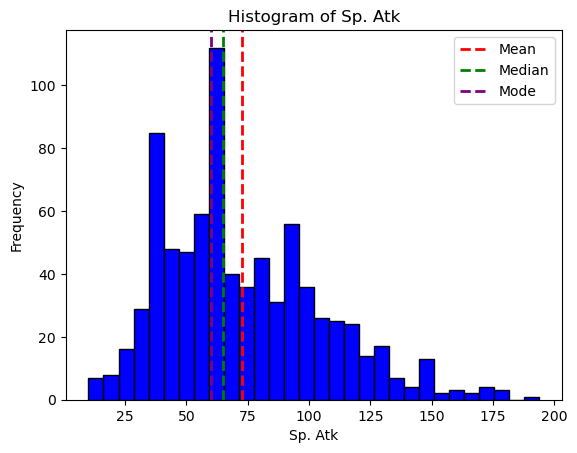

In [23]:
#YOUR CODE

import matplotlib.pyplot as plt

# Compute the mean, median, and mode
mean_value = df['Sp. Atk'].mean()
median_value = df['Sp. Atk'].median()
mode_value = df['Sp. Atk'].mode()[0]

# Plot the histogram
plt.hist(df['Sp. Atk'], bins=30, color='blue', edgecolor='black')

# Plot mean, median, and mode
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Add labels and legend
plt.xlabel('Sp. Atk')
plt.ylabel('Frequency')
plt.title('Histogram of Sp. Atk')
plt.legend()

# Show the plot
plt.show()


Is the distribution skewed? Explain your answer.

**Answer** \#YOUR ANSWER

The histogram shows that the distribution has a longer tail on the right side (higher values), which indicates that there are a few Pokémon with very high special attack stats, while the majority of the Pokémon cluster around lower to medium values

# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

In [24]:
#YOUR CODE

# Compute measures of central tendency for 'Sp. Atk' for legendary Pokémon
legendary_sp_atk = df[df['Legendary'] == True]['Sp. Atk']
legendary_mean = legendary_sp_atk.mean()
legendary_median = legendary_sp_atk.median()
legendary_mode = legendary_sp_atk.mode()[0]

# Compute measures of central tendency for 'Sp. Atk' for non-legendary Pokémon
non_legendary_sp_atk = df[df['Legendary'] == False]['Sp. Atk']
non_legendary_mean = non_legendary_sp_atk.mean()
non_legendary_median = non_legendary_sp_atk.median()
non_legendary_mode = non_legendary_sp_atk.mode()[0]

# Print the results for both groups
print("Legendary Pokémon - Sp. Atk")
print(f"Mean: {legendary_mean}")
print(f"Median: {legendary_median}")
print(f"Mode: {legendary_mode}")

print("\nNon-Legendary Pokémon - Sp. Atk")
print(f"Mean: {non_legendary_mean}")
print(f"Median: {non_legendary_median}")
print(f"Mode: {non_legendary_mode}")


Legendary Pokémon - Sp. Atk
Mean: 122.18461538461538
Median: 120.0
Mode: 150

Non-Legendary Pokémon - Sp. Atk
Mean: 68.45442176870748
Median: 65.0
Mode: 60


**Answer** \#YOUR ANSWER

Legendary Pokémon have significantly higher values for Sp. Atk compared to non-legendary ones. Their mean, median, and mode are all much higher, which is expected since legendary Pokémon are typically stronger overall.

Non-legendary Pokémon cluster around lower values for Sp. Atk, with the mean and median being close to 65-68, while the mode is 60

Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

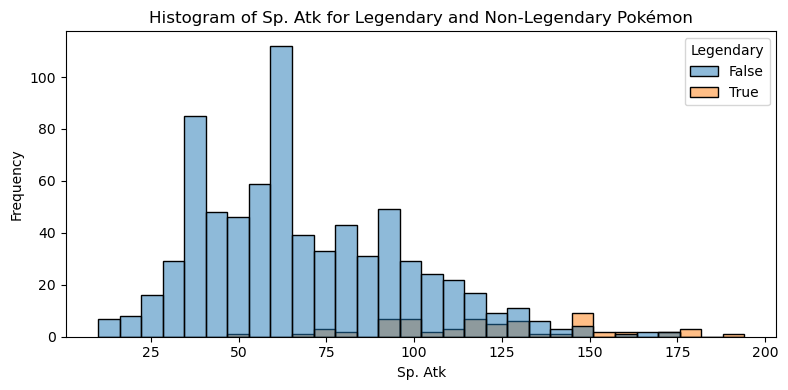

In [26]:
#YOUR CODE

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(8, 4))

# Draw a histogram for 'Sp. Atk' with hue for legendary and non-legendary Pokémon
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', bins=30, kde=False)

# Set labels and title
plt.title('Histogram of Sp. Atk for Legendary and Non-Legendary Pokémon')
plt.xlabel('Sp. Atk')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

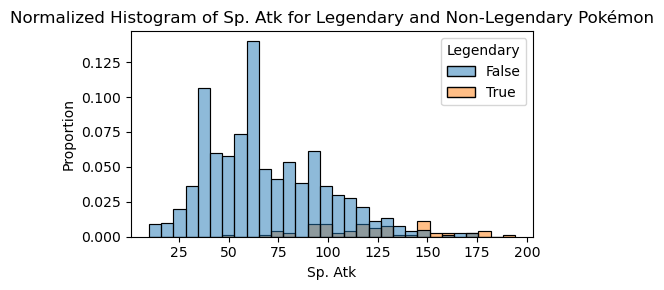

In [29]:
#YOUR CODE

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(5, 3))

# Draw a normalized histogram for 'Sp. Atk' with hue for legendary and non-legendary Pokémon
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', bins=30, kde=False, stat='probability')

# Set labels and title
plt.title('Normalized Histogram of Sp. Atk for Legendary and Non-Legendary Pokémon')
plt.xlabel('Sp. Atk')
plt.ylabel('Proportion')

# Show the plot
plt.tight_layout()
plt.show()


**Answer** \#YOUR ANSWER

The bars for legendary Pokémon are significantly smaller than those for non-legendary Pokémon because there are far fewer legendary Pokémon in the dataset compared to non-legendary ones. This results in a lower frequency of legendary Pokémon, making their bars shorter, even if their Sp. Atk values are higher on average

Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

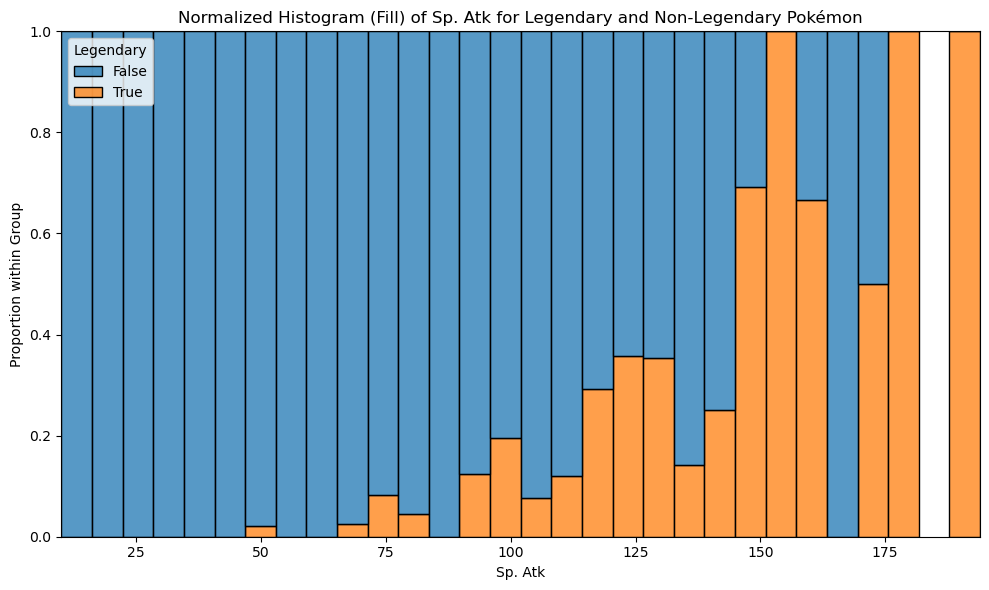

In [31]:
#YOUR CODE

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 6))

# Draw a histogram for 'Sp. Atk' with normalized bars using 'multiple="fill"'
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', bins=30, multiple='fill', kde=False)

# Set labels and title
plt.title('Normalized Histogram (Fill) of Sp. Atk for Legendary and Non-Legendary Pokémon')
plt.xlabel('Sp. Atk')
plt.ylabel('Proportion within Group')

# Show the plot
plt.tight_layout()
plt.show()



Now, make conclusions about the distributions

**Answer** \#YOUR ANSWER

The distribution of Sp. Atk for non-legendary Pokémon is concentrated around lower values, with a peak in the range of 50-70. This suggests that most non-legendary Pokémon have moderate special attack stats.
In contrast, the distribution for legendary Pokémon is skewed toward higher values, with a significant concentration in the 120-150 range. This indicates that legendary Pokémon tend to have much stronger special attack stats overall.
Comparing Proportions:

The normalized histogram shows that non-legendary Pokémon dominate the lower end of the distribution (below 80 Sp. Atk). A large proportion of non-legendary Pokémon have low to moderate special attack values.
On the other hand, legendary Pokémon have a higher proportion of individuals with very high Sp. Atk values (above 120), which sets them apart from non-legendary Pokémon.
Right-Skew in Both Groups:

Both distributions exhibit right skewness, meaning that there are a few Pokémon with extremely high Sp. Atk values, but most Pokémon (both legendary and non-legendary) have lower values.
The skewness is more pronounced in non-legendary Pokémon, where the majority have lower Sp. Atk stats.
Legendary vs. Non-Legendary:

Legendary Pokémon clearly have a much stronger Sp. Atk profile compared to non-legendary Pokémon, as seen in the higher proportions in the upper tail of the distribution (above 120 Sp. Atk).